<a href="https://colab.research.google.com/github/akeshri003/bookish-meme/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore a an example PyTorch end-to-end workflow

In [ ]:
import numpy as np

In [ ]:
what_we_are_covering = {1: "data (prepare and load)",
                        2: "build model",
                        3: "fitting the model to data (training)",
                        4: "making predictions and evaluating a model (inference)",
                        5: "saving and loading a model"}

what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.1+cu121'

## 1. Data (Preparing and Loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of 2 parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some know data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [ ]:
# Create known parameters
weight = 0.7
bias = 0.3

#  Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
print(X.shape)
y = weight * X + bias

X[:10], y[:10]

torch.Size([50, 1])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets (one of the most important concepts in Machine Learning in general)

Let's create training and test set with out data

In [ ]:
# Create a train-test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s = 4, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s = 4, label="predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

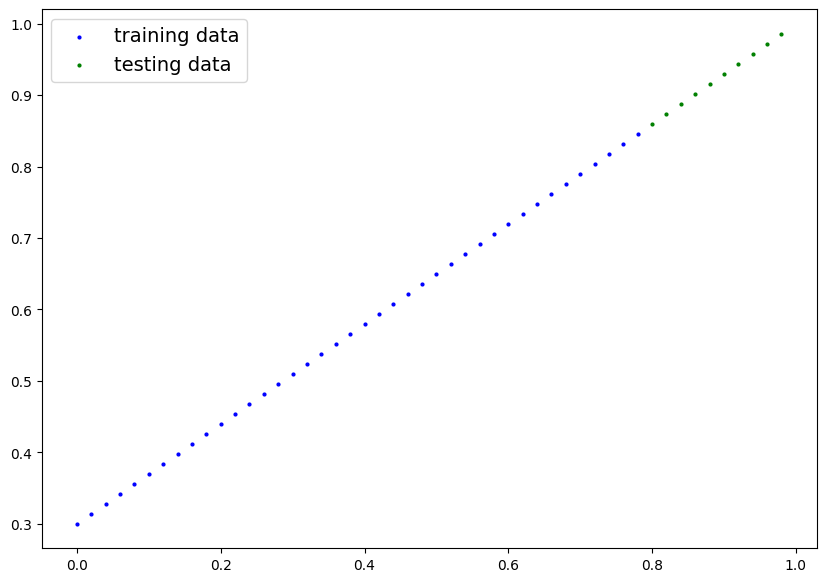

In [ ]:
plot_predictions()

## 2. Build model

Out first PyTorch model

What ourmodel does?
* Start with random values (weights and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so>
1. Gradient Descent
2. Back Propogation

In [ ]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn (size=1, # <- start with a random weight and try to adjust it to the ideal weight, it could be different layers from torch.nn, single-value (current case) or hard coded values or functions
                                           requires_grad = True, # <- can this parameter be updated via gradient descent?
                                           dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    self.bias = nn.Parameter(torch.randn(size=1,
                                         requires_grad = True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  # forward defines the computation performed at every cell. Any subclass of
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- x is the input data, required to be defined for any & every model.
    return self.weights * x + self.bias # linear regression formula

from types import MethodDescriptorType
## PyToch model building essentials

* torch.nn - contains all of the buildings for computational graphs ( a neural netwrok can be considered a computation graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural netword modules, if you subclass it, you should overwrite forward() Method
* torch.optim - this where the optmizers in PyTorch live. They will help with gradient descent.torch
* def forward() - All nn.Module subclasses requires you to overwrite forward(), this method defines what happens in the forward computation.

For more info - https://pytorch.org/tutorials/beginner/ptcheat.html


### Checking the contents of our PyTorch model

We can check our model parameters ro what's inside our model using `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is subclass of nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predicting power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the forward() method.

In [ ]:
# Make predictions with model

with torch.inference_mode(): # this is a context-manager
  y_preds = model_0(X_test)

len(y_preds), len(y_test)

(10, 10)

In [ ]:
# Make predictions with model
# You can also do something similar with torch.no_grad(), but inference_mode is preferred
with torch.no_grad(): # this is a context-manager
  y_preds = model_0(X_test)

len(y_preds), len(y_test)

(10, 10)

In [ ]:
# we can also predict using
y_preds = model_0(X_test)
y_preds

# Whats the difference between this and previous one??
# What innference mode does is, it turns off all the gradient tracking. Cause we dont need grad descent during testing. INference mode disables all of the useful thing required for training. Which means predictions now becomes faster, because it has lesser/smaller set of parameters to keep track of.

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

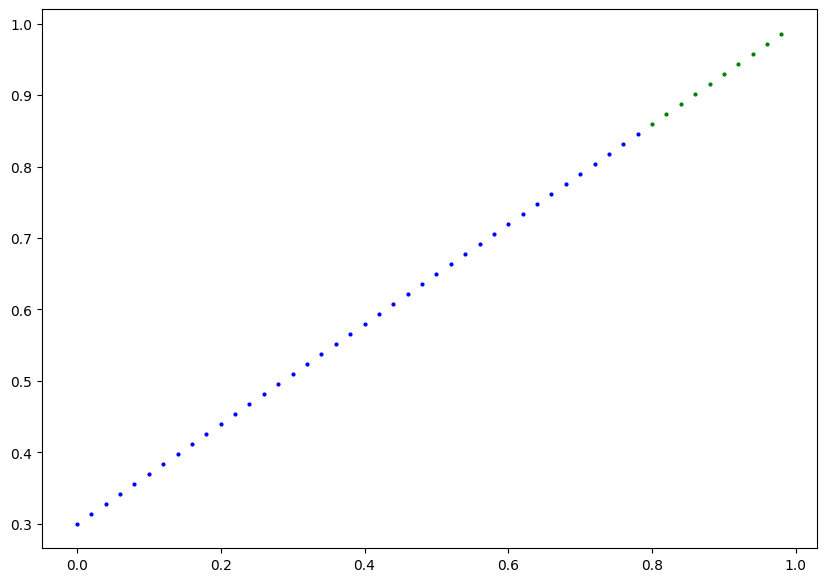

In [ ]:
plot_predictions(predictions=y_preds)

See more on inference mode here - https://x.com/PyTorch/status/1437838231505096708?lang=en

inference_mode() is fairly new in pytorch.

## 3. Train model

The whole idea for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model's predictions are to use a loss functions

* Note: Loss function may also be called cost function or criterion. For ou case, they are called loss function only.

Things we need to train:

* **Loss Function:** A loss function is a function to measure, how wrong your model's predictions compared to the ideal.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g., weight & bias) to improve the loss function.

And specifically for PyTorch, we need:
* a training loop
* a testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an Optmizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01) # lr = learning rate

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass / Forward propagation (this involves data moving through ouur model's forward function) to calculate predictions on data
2. Calculate the loss (compare forward pass predictions to groud truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
torch.manual_seed(42)
# An epoch is one loop through the data... (this is a hyperparameter)
epochs = 100

# Tracking progress
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all the parameters that require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop, so we have to  zero them above in step 3 of for the next iteration of the loop

  # Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout, batch_norm)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scene
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # To check for overfit and bias
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")

    # Print out model.state_dict()
    print(model_0.state_dict())


Loss: 0.3013603389263153
Epoch: 0 | Test: 0.3013603389263153 | Test loss: 0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Loss: 0.18615034222602844
Epoch: 10 | Test: 0.18615034222602844 | Test loss: 0.3328842222690582
OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Loss: 0.08227583020925522
Epoch: 20 | Test: 0.08227583020925522 | Test loss: 0.2069590985774994
OrderedDict([('weights', tensor([0.4222])), ('bias', tensor([0.3403]))])
Loss: 0.07638873159885406
Loss: 0.0

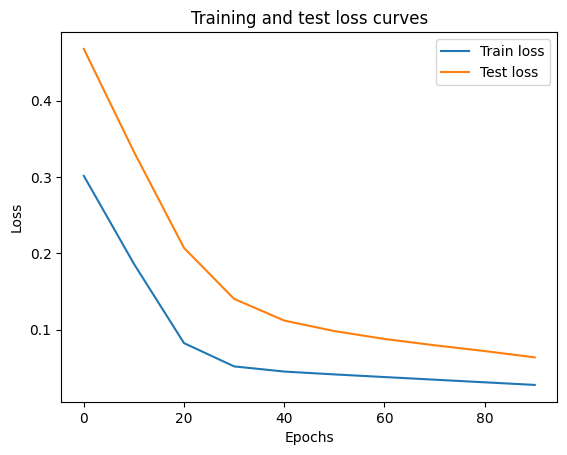

In [ ]:
# Plot the loss curves
plt.plot(np.array(epoch_count), np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(np.array(epoch_count), np.array(test_loss_values), label="Test loss")
plt.title("Training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])

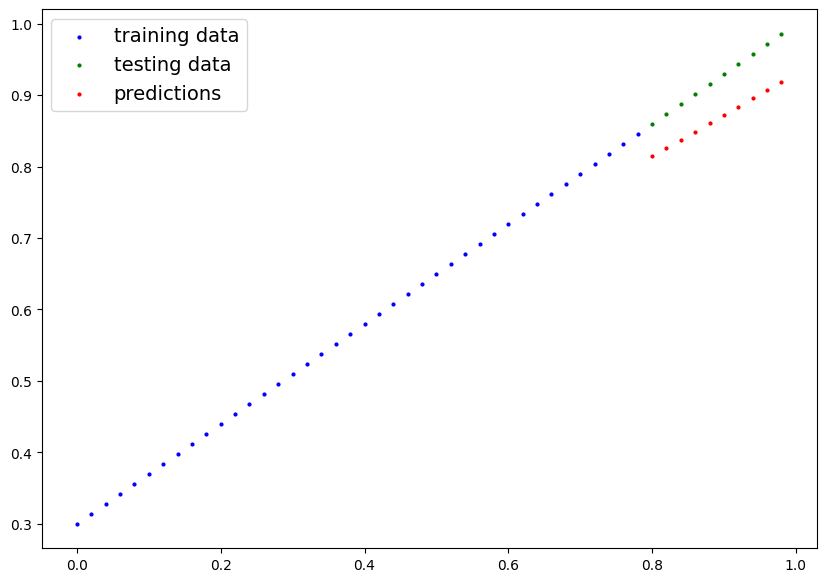

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are 3 main methos you should about for saving a loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [ ]:
model_0.state_dict(zz)

OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model in state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1580 Oct 17 16:51 01_pytorch_workflow_0.pth


### Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and `state_dict()` into that.

In [ ]:
import torch

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the save state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

NameError: name 'LinearRegressionModel' is not defined

In [ ]:
loaded_model_0.state_dict()

NameError: name 'loaded_model_0' is not defined

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
import torch
from torch import nn

# Create a linear regression model class
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called Linear Transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1, # <- input feature of size 1
                                  out_features=1) # <- output feature of size 1

  def forward(self, x: torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

# Set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training

For trainingwe need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. Loss
  loss = loss_fn(y_pred, y_train)

  # 3. zero grad
  optimizer.zero_grad()

  # 4. back propagation
  loss.backward()

  # 5. gradient descent
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # print
  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test_Loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test_Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test_Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test_Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test_Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test_Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test_Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test_Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test_Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test_Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test_Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test_Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test_Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test_Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test_Loss: 0.013801801018416

In [ ]:
model_1.state_dict()
y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
def plotter(train_data = X_train,
            train_label = y_train,
            test_data = X_test,
            test_label = y_test,
            predictions = None):
  plt.figure(10, 7)
  plt.scatter(train_data, train_label, c="b", s=4)
  plt.scatter(test_data, test_label, c="g", s=4)

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4)

  plt.legend(prop={"size": 16})

<ipython-input-36-7f0b99793e8b>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  def plotter(train_data = np.array(torch.tensor(X_train).numpy()),


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
plotter(predictions=y_preds.cpu())

TypeError: Value after * must be an iterable, not int